In [1]:
from bs4 import BeautifulSoup
from requests import get
from datetime import datetime
import csv
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

pd.set_option('display.float_format', lambda x: '%.2f' % x)

In [2]:
"""
The class contains methods responsible for extracting real estate data from an indicated webpage (in this case from gethome.pl)
and saving results to .csv files.
"""
class EstateScrapper():
    ### options ###
    
    # 1. choose real estates between startYear and endYear
    # those variables will help to find between 20 and 30 first results for every year from the assigned period of time
    startYear = 1989
    endYear = 2012

    # 2. choose URL address where your data will be taken from
    # NOTE: due to the project being still in its initial stage, for now it is only possible to use the following URLs
    #URL = 'https://gethome.pl/nieruchomosci/na-sprzedaz/pomorskie/'
    URL = 'https://gethome.pl/nieruchomosci/na-sprzedaz/pomorskie/?construction_year__gte='+str(startYear)+'&construction_year__lte='+str(startYear+1)

    page = get(URL)
    bs = BeautifulSoup(page.content, 'html.parser')
    
    # supportive methods
    
    def parse_price(price):
        return float(price.replace(' ', '').replace('zł', '').replace(',', '.'))

    def parse_size(size):
        return float(size.replace(' ', '').replace('m2', '').replace(',', '.'))

    def parse_rooms(roomCount):
        s = ''.join(filter(str.isdigit, roomCount))
        return int(s)
    
    # main method
    """
    The method scraps data from the previously chosen URL and saves it as .csv file with a name passed as an argument
    """
    @staticmethod
    def write_to_CSV(name):
        counter = EstateScrapper.startYear
        
        # Column names:
        # location; price; listingType; roomCount; propertySize; year_of_construction; date \n ;...
        print("Starting scrapping data from chosen URL.")
        
        while counter <= EstateScrapper.endYear:
            print("Year:", counter)
            try:
                with open(name, "a", encoding="utf-8") as plikCSV:
                    for offer in EstateScrapper.bs.find_all('div', class_='gh-1ovnd3m'):
                        location = offer.find('p', class_='gh-1ikb1lv').get_text().strip().split(',')[0]
                        price = EstateScrapper.parse_price(offer.find('p', class_='gh-1615kub').get_text())
                        listingType = offer.find('span', class_='gh-13exhcg e5w6tkq1').get_text()
                        roomCount = EstateScrapper.parse_rooms(offer.find('span', class_='gh-1plmch9 e5w6tkq1').get_text())
                        propertySize = EstateScrapper.parse_size(offer.find_all('span', class_='gh-1plmch9 e5w6tkq1')[1].get_text())
                        date = datetime.today().strftime('%Y-%m-%d')
                        year_of_construction = str(counter)

                        plikCSV.write(location+";"+str(price)+";"+listingType+";"+str(roomCount)+";"+str(propertySize)+";"+year_of_construction+";"+str(date)+"\n")

            except:
                with open(name, "w", encoding="utf-8") as plikCSV:
                    for offer in EstateScrapper.bs.find_all('div', class_='gh-1ovnd3m'):
                        location = offer.find('p', class_='gh-1ikb1lv').get_text().strip().split(',')[0]
                        price = EstateScrapper.parse_price(offer.find('p', class_='gh-1615kub').get_text())
                        listingType = offer.find('span', class_='gh-13exhcg e5w6tkq1').get_text()
                        roomCount = EstateScrapper.parse_rooms(offer.find('span', class_='gh-1plmch9 e5w6tkq1').get_text())
                        propertySize = EstateScrapper.parse_size(offer.find_all('span', class_='gh-1plmch9 e5w6tkq1')[1].get_text())
                        date = datetime.today().strftime('%Y-%m-%d')
                        year_of_construction = str(counter)

                        plikCSV.write(location+";"+str(price)+";"+listingType+";"+str(roomCount)+";"+str(propertySize)+";"+year_of_construction+";"+str(date)+"\n")
            counter+=1
        print("Done!")


In [3]:
"""
The class contains methods rensponsible for filtering, grouping and presenting data by different criteria 
"""
class Analizer:
    # choose a file which you want to analyze
    fileName = 'estates.csv'
    
    # point out the columns' names
    columnNames = ['location', 'price', 'listingType', 'roomCount', 'propertySize', 'year_of_construction', 'date']
    
    df = pd.read_csv(fileName, index_col=False, header=None, names=columnNames, delimiter=';')
    
    def showGeneralStats():
       print(Analizer.df.describe())
    
    def meanPriceByLocation():
        file=Analizer.df
        meanPriceByLocation = file.groupby(['location'])['price'].mean()
        print(meanPriceByLocation)
        meanPriceByLocation.to_csv('sredniaCenaWgLokalizacji.csv', sep=';', encoding='utf-8')
        
    def meanPricePerSquareByYearOfConstruction():
        file=Analizer.df
        file["pricePerSquareM"] = round(file["price"] / file["propertySize"], 2)
        meanPricePerSquareByYearOfConstruction = file.groupby(['year_of_construction'])['pricePerSquareM'].mean()
        meanPricePerSquareByYearOfConstruction.to_csv('sredniaCenaZaKwadratWgRokuBudowy.csv', sep=';', encoding='utf-8')
        
    def meanPriceForSquareMeterByLocation():
        file=Analizer.df
        file["pricePerSquareM"] = round(file["price"] / file["propertySize"], 2)
        meanPriceForSquareByLocation = file.groupby(['location'])['pricePerSquareM'].mean()
        print(meanPriceForSquareByLocation)
        meanPriceForSquareByLocation.to_csv('sredniaCenaZaMetrWgLokalizacji.csv', sep=';', encoding='utf-8')
    
    def listOffers():
        file=Analizer.df
        print(file)

# Run to obtain data

In [4]:
# Run to create or append existing file
EstateScrapper.write_to_CSV("estates.csv")

Starting scrapping data from chosen URL.
Year: 1989
Year: 1990
Year: 1991
Year: 1992
Year: 1993
Year: 1994
Year: 1995
Year: 1996
Year: 1997
Year: 1998
Year: 1999
Year: 2000
Year: 2001
Year: 2002
Year: 2003
Year: 2004
Year: 2005
Year: 2006
Year: 2007
Year: 2008
Year: 2009
Year: 2010
Year: 2011
Year: 2012
Done!


# Run to see results

In [5]:
# Use to show general info
Analizer.showGeneralStats()

           price  roomCount  propertySize  year_of_construction
count     576.00     576.00        576.00                576.00
mean   892537.46       4.83        187.20               2000.50
std    597497.62       2.14        127.37                  6.93
min    257000.00       2.00         49.50               1989.00
25%    577250.00       3.00         68.12               1994.75
50%    699000.00       4.50        147.65               2000.50
75%    967500.00       6.00        273.00               2006.25
max   3000000.00      10.00        550.00               2012.00


In [6]:
# Use to list offers with average prices for meter square grouped by location
Analizer.meanPriceForSquareMeterByLocation()

location
Chojnice             3014.18
Dzierzgoń            2146.45
Gdańsk               8606.82
Gdynia               7048.90
Lębork               3289.70
Reda                 5181.48
Sopot               13975.16
Starogard Gdański    5454.55
bytowski             1938.74
gdański              2526.32
lęborski             2220.46
pomorskie            4500.00
pucki                4166.67
starogardzki         3999.05
Name: pricePerSquareM, dtype: float64


In [7]:
# Use to show all offers with average price per property grouped by location
Analizer.meanPriceByLocation()

location
Chojnice             849999.00
Dzierzgoń            299000.00
Gdańsk               828000.00
Gdynia              1013000.00
Lębork               482000.00
Reda                1399000.00
Sopot                900000.00
Starogard Gdański   3000000.00
bytowski             257000.00
gdański              960000.00
lęborski             699000.00
pomorskie            990000.00
pucki                650000.00
starogardzki         419900.00
Name: price, dtype: float64


In [8]:
# Use to show all offers
Analizer.listOffers()

     location      price listingType  roomCount  propertySize  \
0        Reda 1399000.00         Dom         10        270.00   
1       pucki  650000.00         Dom          3        156.00   
2      Lębork  265000.00  Mieszkanie          3         57.14   
3      Gdynia  679000.00  Mieszkanie          3         66.70   
4      Gdynia 1850000.00         Dom          5        225.22   
..        ...        ...         ...        ...           ...   
571     Sopot  900000.00  Mieszkanie          2         64.40   
572    Gdynia 1049000.00         Dom          5        208.00   
573  bytowski  257000.00  Mieszkanie          4        132.56   
574  Chojnice  849999.00         Dom          6        282.00   
575  lęborski  699000.00         Dom          9        314.80   

     year_of_construction        date  pricePerSquareM  
0                    1989  2022-01-17          5181.48  
1                    1989  2022-01-17          4166.67  
2                    1989  2022-01-17          4

In [9]:
# Use to list the ranking of the average cheapest locations 
pricesPerSquareASC=pd.read_csv('sredniaCenaZaMetrWgLokalizacji.csv', index_col=False, header=0, delimiter=';')
pricesPerSquareASC.sort_values(by=['pricePerSquareM'], inplace=True)
pricesPerSquareASC

,location,pricePerSquareM
8,bytowski,1938.74
1,Dzierzgoń,2146.45
10,lęborski,2220.46
9,gdański,2526.32
0,Chojnice,3014.18
4,Lębork,3289.70
13,starogardzki,3999.05
12,pucki,4166.67
11,pomorskie,4500.00
5,Reda,5181.48


<AxesSubplot:xlabel='location'>

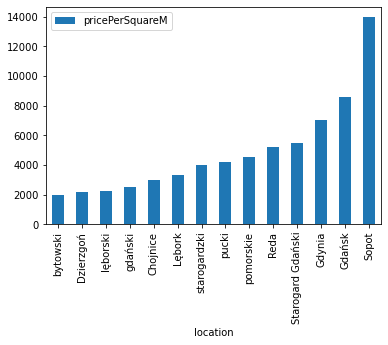

In [10]:
# Use to show plot
pricesPerSquareASC.plot(kind='bar',x='location',y='pricePerSquareM')

In [11]:
#filtering
score = pricesPerSquareASC[pricesPerSquareASC['pricePerSquareM'] > 3000]
score

,location,pricePerSquareM
0,Chojnice,3014.18
4,Lębork,3289.70
13,starogardzki,3999.05
12,pucki,4166.67
11,pomorskie,4500.00
5,Reda,5181.48
7,Starogard Gdański,5454.55
3,Gdynia,7048.90
2,Gdańsk,8606.82
6,Sopot,13975.16


In [12]:
# Use to create .csv file with average meter square prices by year of construction
Analizer.meanPricePerSquareByYearOfConstruction()

In [13]:
# Use to print average meter square prices by year of construction
avgPricePerMeterByYearOfConstruction=pd.read_csv('sredniaCenaZaKwadratWgRokuBudowy.csv', index_col=False, header=0, delimiter=';')
avgPricePerMeterByYearOfConstruction


,year_of_construction,pricePerSquareM
0,1989,5941.16
1,1990,5941.16
2,1991,5941.16
3,1992,5941.16
4,1993,5941.16
5,1994,5941.16
6,1995,5941.16
7,1996,5941.16
8,1997,5941.16
9,1998,5941.16


<AxesSubplot:xlabel='year_of_construction'>

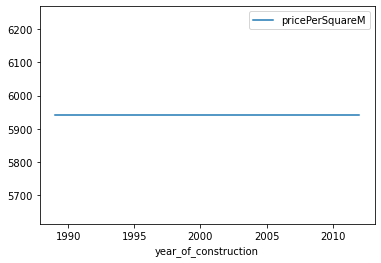

In [14]:
avgPricePerMeterByYearOfConstruction.plot(kind='line', x='year_of_construction',y='pricePerSquareM')